In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from zipfile import ZipFile 
with ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [15]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


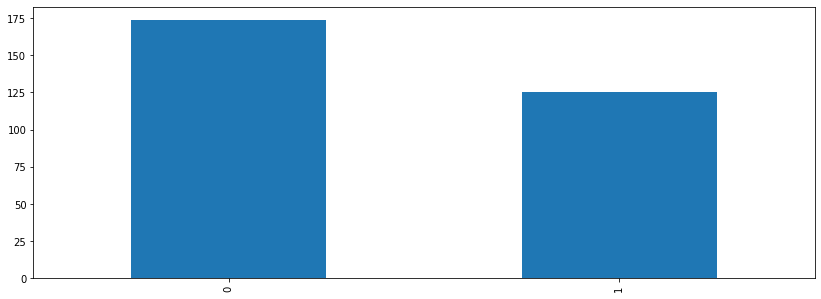

In [20]:
fig=plt.figure(figsize=(14,5))
df["diabetes"].value_counts().plot.bar() #столбчатая диограмма #метод value counts помогает посчитать статистики
df["diabetes"].value_counts().sort_index().plot.bar() #sort by index
plt.show()

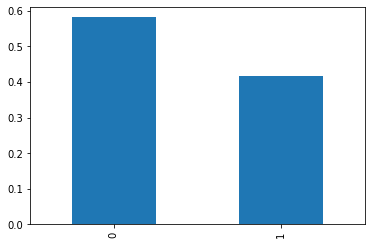

In [23]:
# Можно посмотреть относительные наблюдения
(df["diabetes"].value_counts()/len(df)).plot.bar() #столбчатая диограмма #метод value counts помогает посчитать статистики
# df["diabetes"].value_counts().sort_index()).plot.bar() #sort by index
plt.show()

In [25]:
df.groupby(['DEATH_EVENT'])[['age','anaemia']].mean() #двойные квадртатные скобки  помогают выбирать несколько(в данном случае две) колонки, а не одну

,age,anaemia
DEATH_EVENT,,
0,58.761906,0.408867
1,65.215281,0.479167


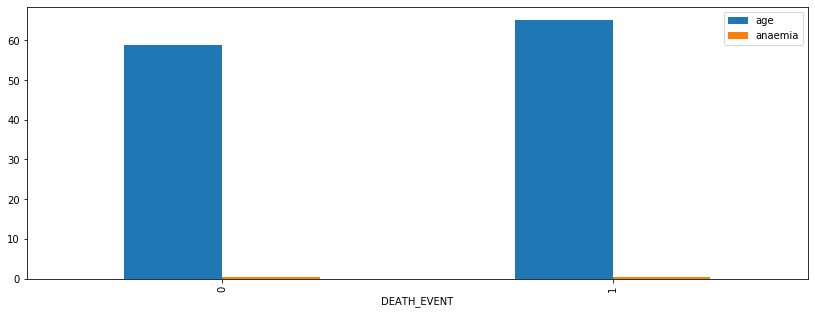

In [26]:
df.groupby(['DEATH_EVENT'])[['age','anaemia']].mean().plot.bar(figsize=(14,5),stacked=False)

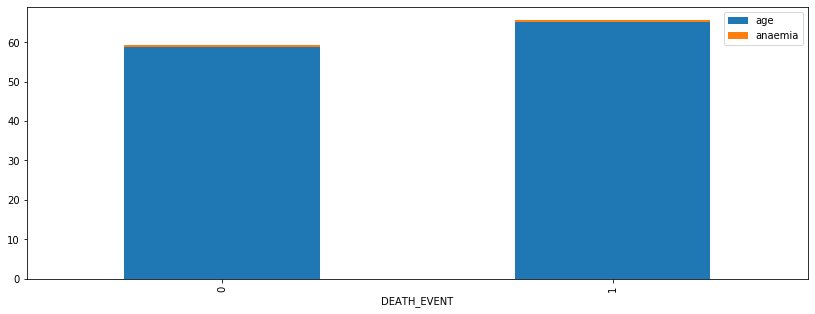

In [27]:
df.groupby(['DEATH_EVENT'])[['age','anaemia']].mean().plot.bar(figsize=(14,5),stacked=True) #с помощью stacked=True два параметра объединились в один столбик

In [30]:
df['platelets_bin']=df['platelets']//10*10 #создали новый столбик просто patelets округлили до десятых
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,platelets_bin
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1,265000.0
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1,263350.0
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1,162000.0
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1,210000.0
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1,327000.0
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1,204000.0
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1,127000.0
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1,454000.0
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1,263350.0
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1,388000.0


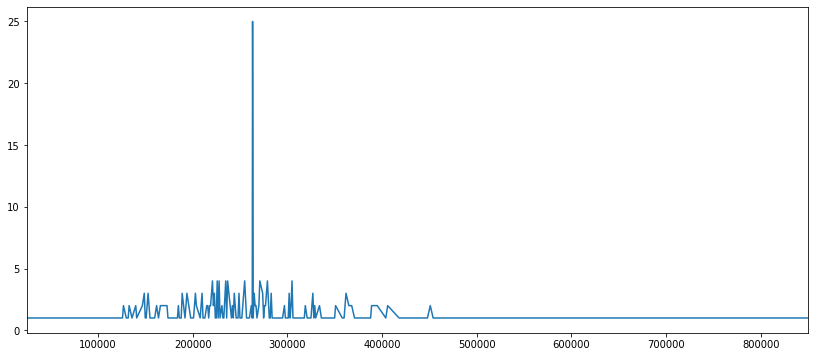

In [32]:
# используется при большом кол-ве значений категориальной переменной 
fig=plt.figure(figsize=(14,6))
chart=df['platelets_bin'].value_counts().sort_index().plot.line()
plt.show()
# мой не оч хорошо тут выглядит

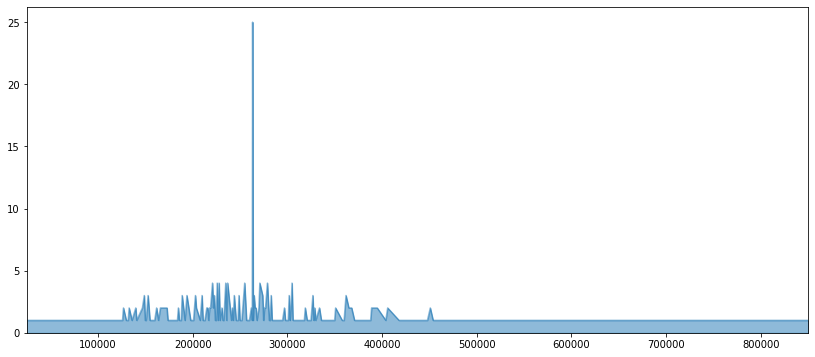

In [35]:
fig=plt.figure(figsize=(14,6))
chart=df['platelets_bin'].value_counts().sort_index().plot.area(alpha=0.5)

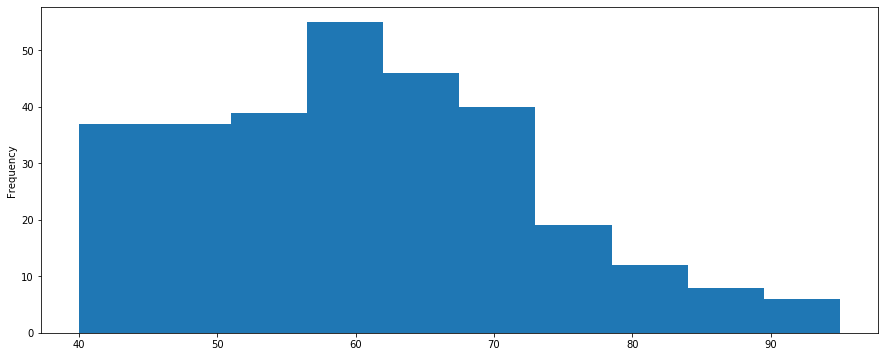

In [37]:
#Гистограмма - саммый популярный метод визуализации интервальных данных
# Визуально похожа на столбчатую диаграмму, но гистограмма разбивает данные на разные интервалы и рисует частоты в кад=ждом из столбцов
fig=plt.figure(figsize=(15,6))
df['age'].plot.hist(bins=10) #кол-во  нтервалов определяет параметр bins
plt.show()

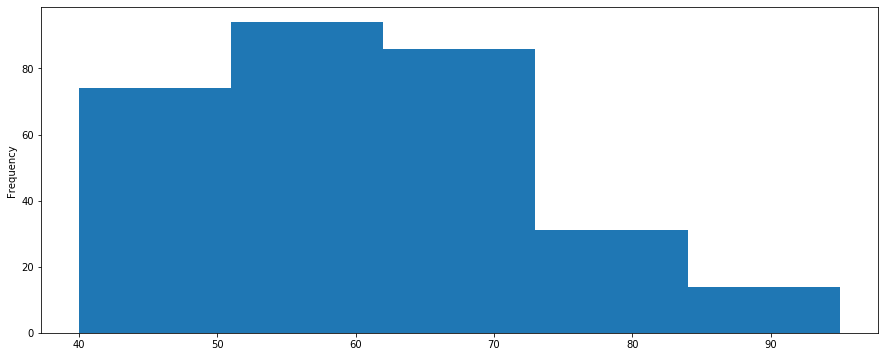

In [38]:
fig=plt.figure(figsize=(15,6))
df['age'].plot.hist(bins=5) #маленькое кол-во интервалов очень редко доет хорошо понять как распределены наши данные
plt.show()

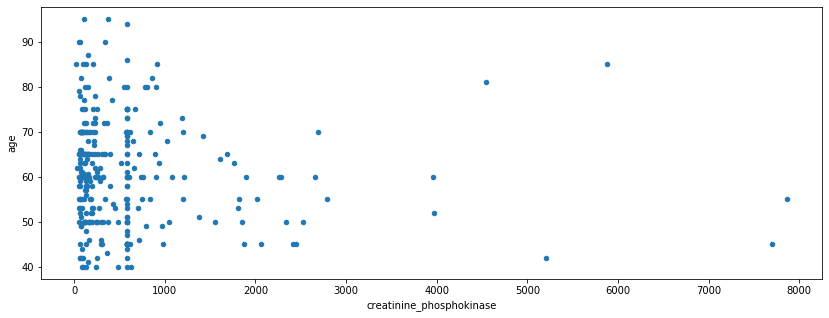

In [39]:
df.plot.scatter(x='creatinine_phosphokinase',y='age', figsize=(14,5))
# scatter plot используется тобы показать зависимость одного параметра от другого

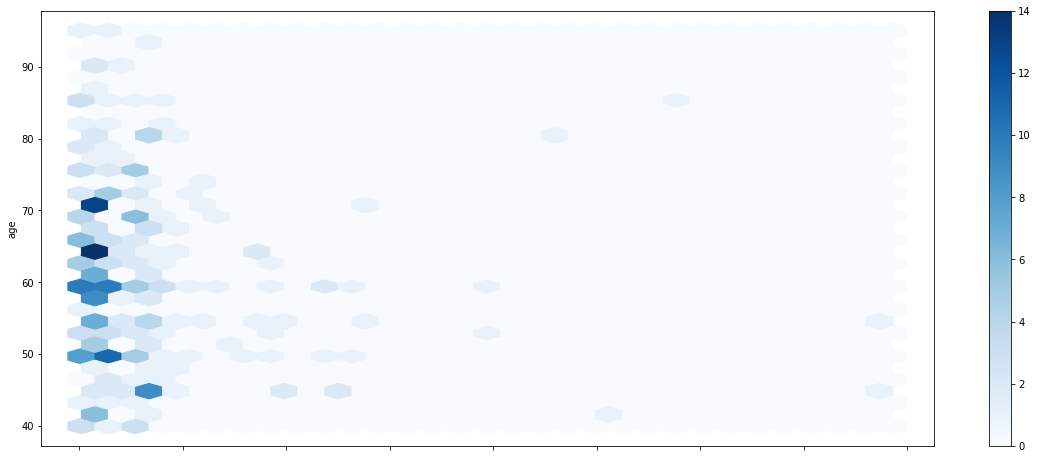

In [41]:
# когда очень большие датасеты и scatter plots выглядят не нагладно, то есть есть какие-то сгустки темные точек в одном месте, лучше использовать hexbin
df.plot.hexbin(x='creatinine_phosphokinase',y='age', figsize=(20,8),gridsize=30,cmap="Blues" )